#  2-Dimensional Gaussian Synthetic Data Generation Strategy

## Importing Packages

In [1]:
import csv
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

## Opening statistical data from initial step

In [2]:
with open('statistical_data/c11_morph_stats.csv') as f:
    df_c11 = pd.read_csv(f)
    df_c11 = df_c11.T.to_dict('list')
    
with open('statistical_data/c11OH_morph_stats.csv') as f:
    df_c11OH = pd.read_csv(f)
    df_c11OH = df_c11OH.T.to_dict('list')
    
with open('statistical_data/c11NF_morph_stats.csv') as f:
    df_c11NF = pd.read_csv(f)
    df_c11NF = df_c11NF.T.to_dict('list')

In [3]:
statistical_data = [df_c11, df_c11OH, df_c11NF]
names_df = ['C11', 'C11OH', 'C11NF']

## Defining Functions

In [4]:
def gaussian_2d(x,y,mu_x,mu_y,sigma):
    return ((1./(2*math.pi*sigma**2)) * math.exp(-((x-mu_x)**2 + (y-mu_y)**2) / (2*(sigma**2))))

In [5]:
def generate_data_Gauss(list_of_dfs, plot_titles, square_dimension):
    for title, dataframe in zip(plot_titles, list_of_dfs):
        for k, v in dataframe.items():
            mu_n_grains, sigma_n_grains = v[0], v[1]
            mu_grain_width, sigma_grain_width = v[2], v[3]
            mu_grain_amp, sigma_grain_amp = v[4], v[5]
            time = v[6]
    
            n_grains = int(np.random.normal(mu_n_grains, sigma_n_grains))

            grain_data = list()

            for i in range(int(n_grains)):
                x = np.random.uniform(0,512)
                y = np.random.uniform(0,512)
                sigma = np.random.normal(mu_grain_width, sigma_grain_width)
                amp = np.random.normal(mu_grain_amp, sigma_grain_amp)

                grain_data.append((x,y,sigma,amp))
                
            # Set up the size of the 2D array
            n_rows = square_dimension
            n_cols = square_dimension

            # Initialize the 2D array of zeros
            sample = np.zeros((n_rows, n_cols))
            
            print(f'Generating: {title} at {time} minutes. N_grains = {n_grains}')
            # Loop through each pixel in the 2D array
            for x in tqdm(range(n_rows)): 
                for y in range(n_cols): 
                    # Loop through each Gaussian function to add
                    for i in range(int(n_grains)):
                        # Calculate the contribution of the Gaussian function to this pixel value
                        gauss = gaussian_2d(x, y, grain_data[i][0], grain_data[i][1], grain_data[i][2])
                        value = grain_data[i][3] * gauss
                        # Add the contribution of the Gaussian function to the pixel value
                        sample[x, y] += value
                        
            plt.figure(figsize=(15,15))
            plt.imshow(sample)
            plt.title(f'{title} at {time} minutes. N_grains = {n_grains}')
            plt.show()

## Creating Data

Generating: C11 at 5.0 minutes. N_grains = 1398


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [05:49<00:00,  1.47it/s]


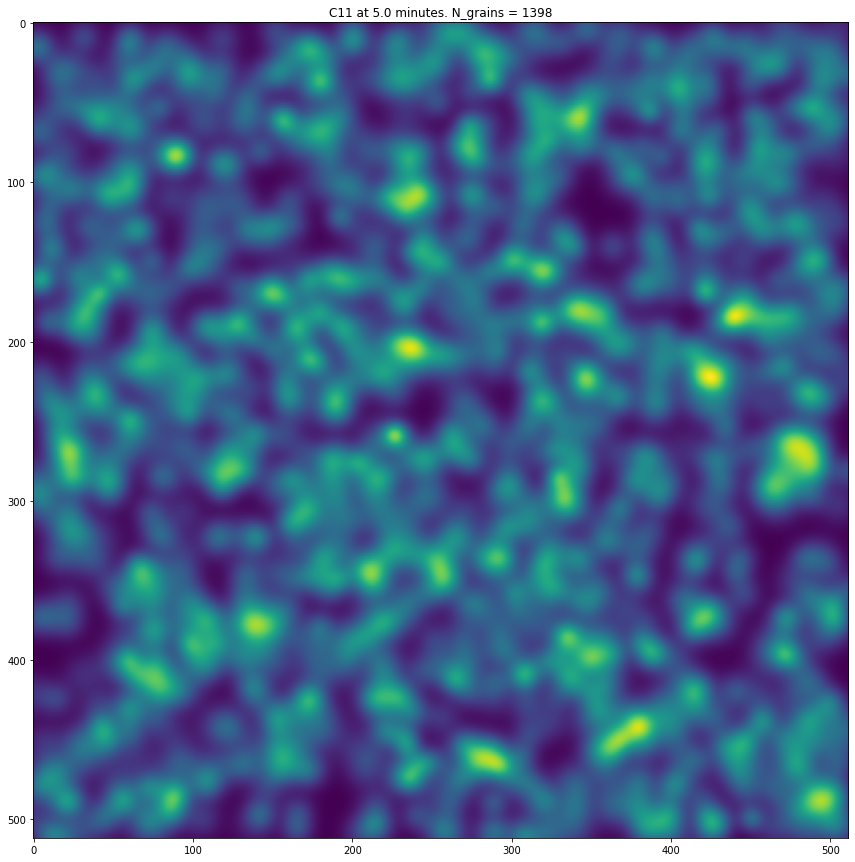

Generating: C11 at 14.0 minutes. N_grains = 894


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [03:49<00:00,  2.23it/s]


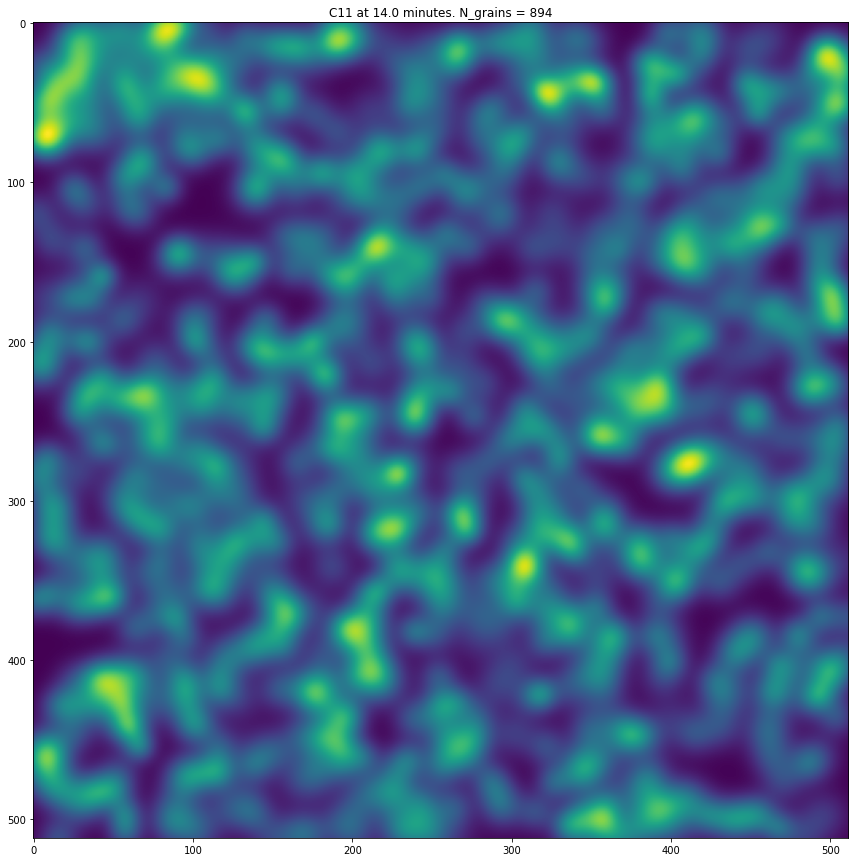

Generating: C11 at 31.0 minutes. N_grains = 814


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [03:23<00:00,  2.52it/s]


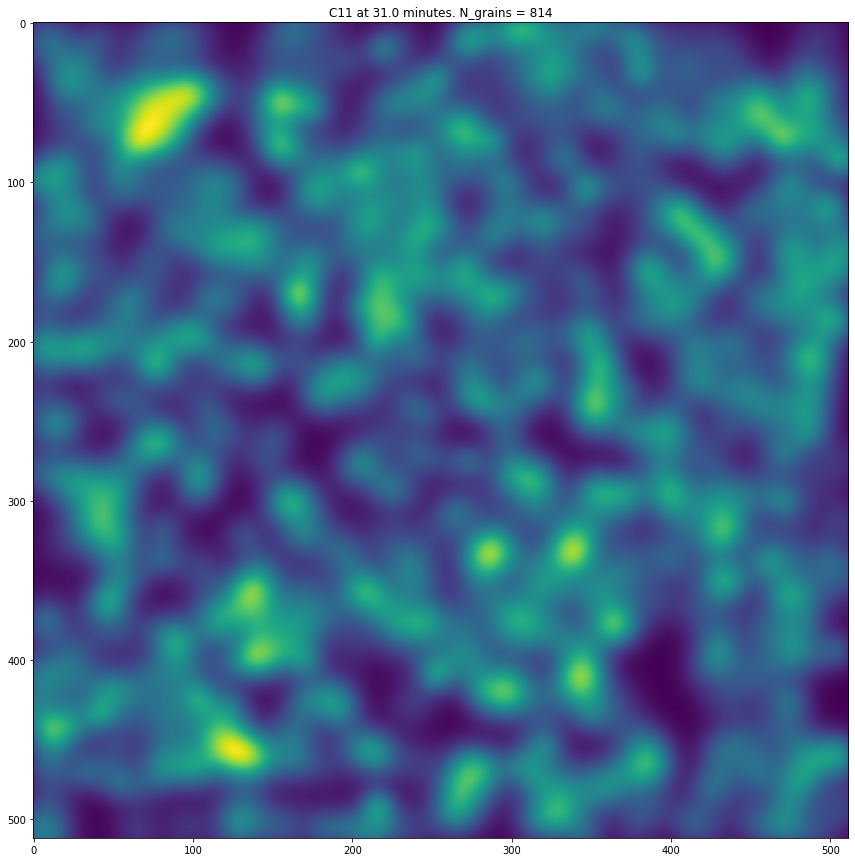

Generating: C11 at 77.0 minutes. N_grains = 703


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:51<00:00,  2.99it/s]


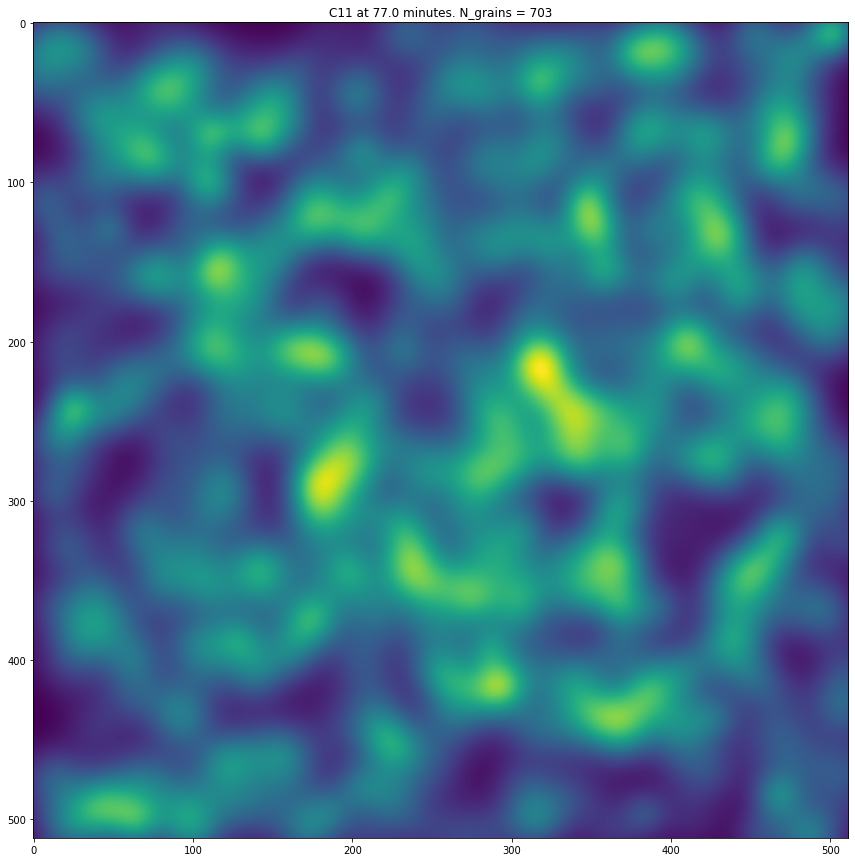

Generating: C11 at 130.0 minutes. N_grains = 678


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:47<00:00,  3.05it/s]


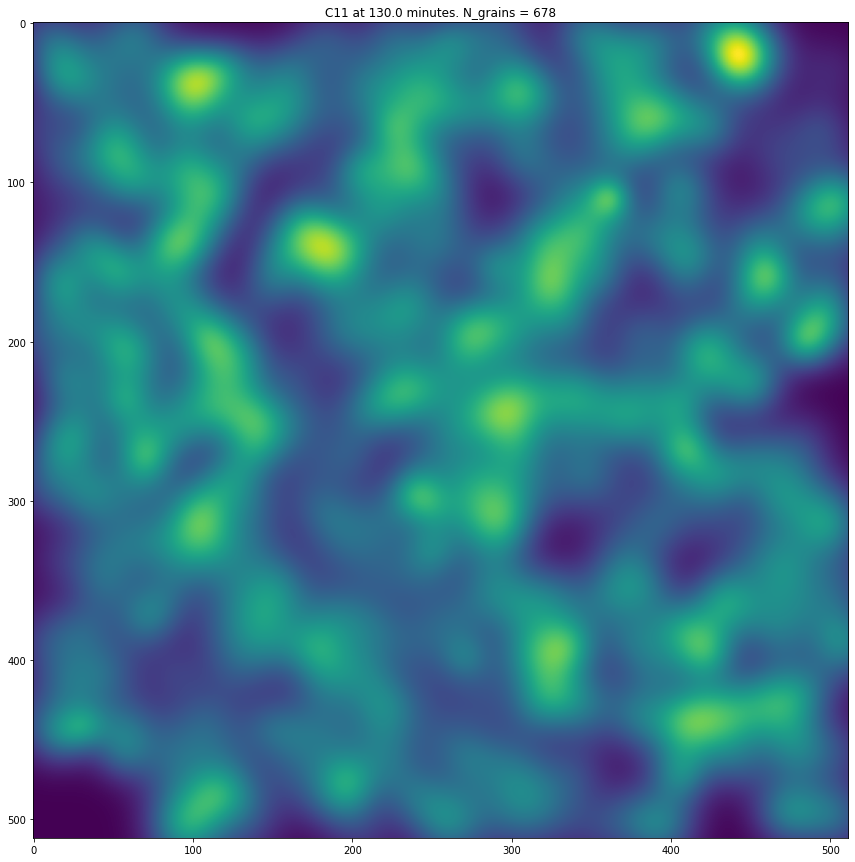

Generating: C11OH at 4.0 minutes. N_grains = 878


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [03:58<00:00,  2.15it/s]


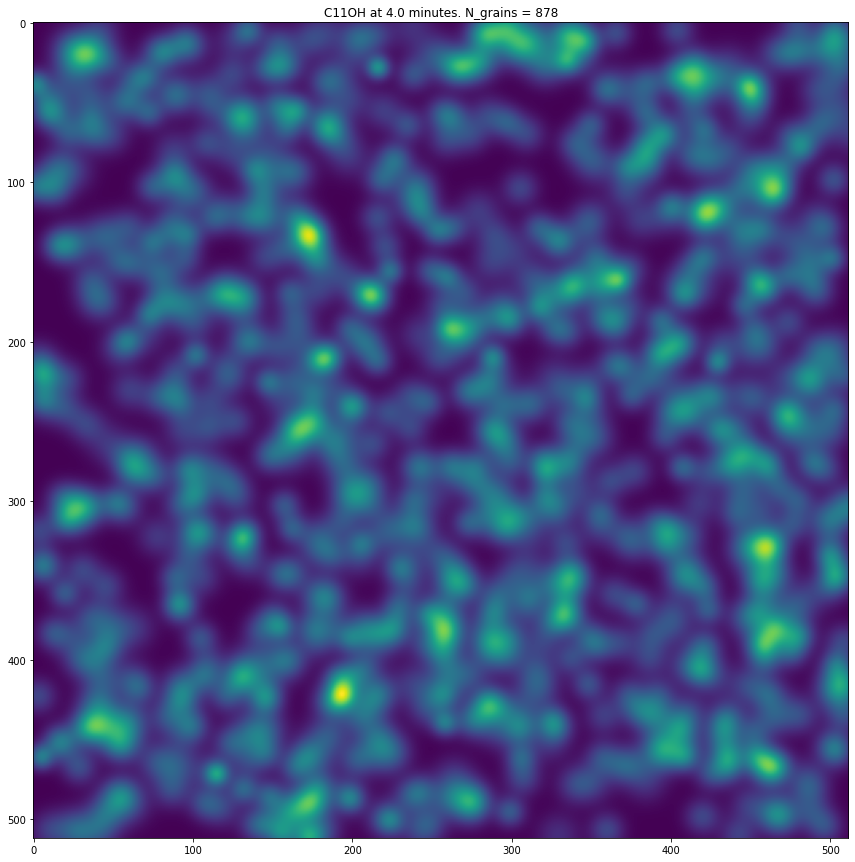

Generating: C11OH at 18.0 minutes. N_grains = 2335


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [10:49<00:00,  1.27s/it]


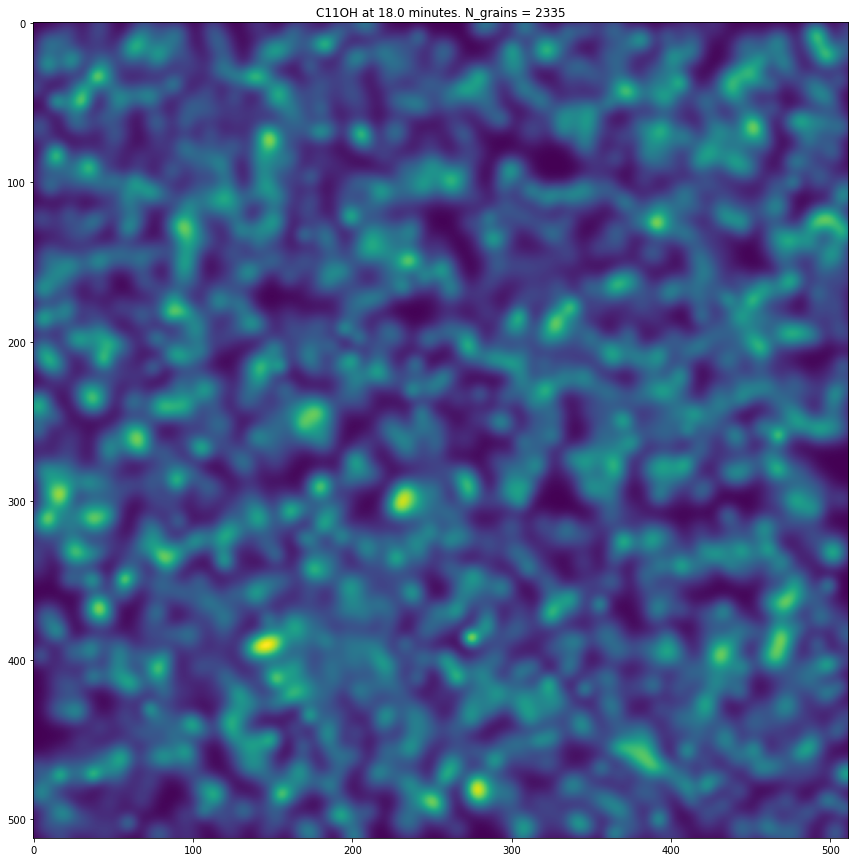

Generating: C11OH at 66.0 minutes. N_grains = 550


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:27<00:00,  3.47it/s]


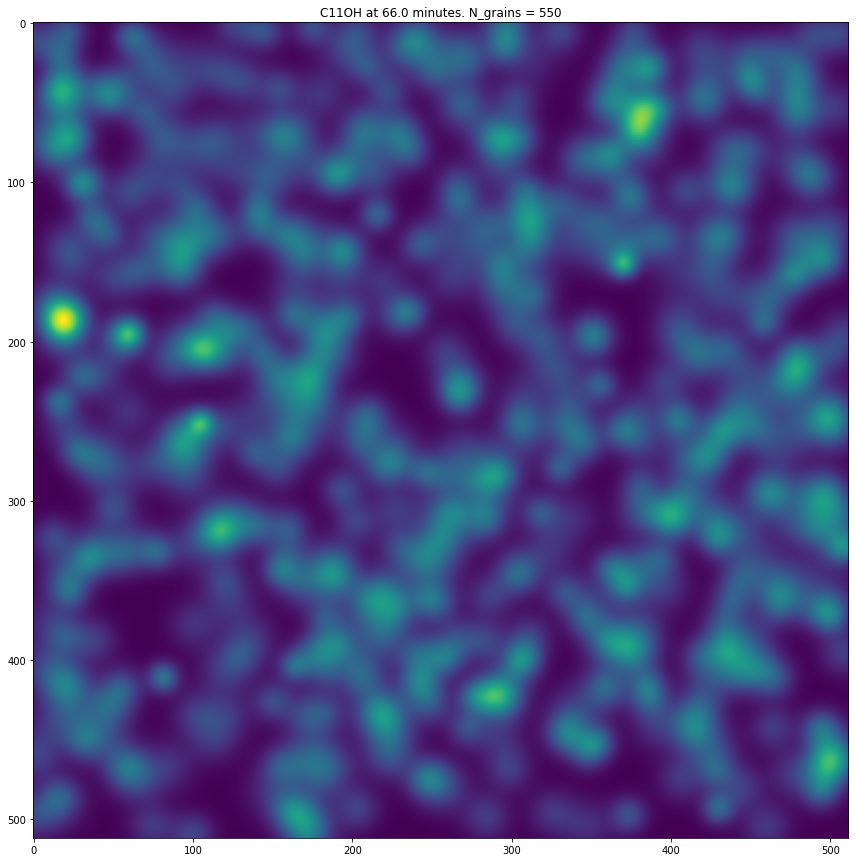

Generating: C11OH at 100.0 minutes. N_grains = 1306


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [07:52<00:00,  1.08it/s]


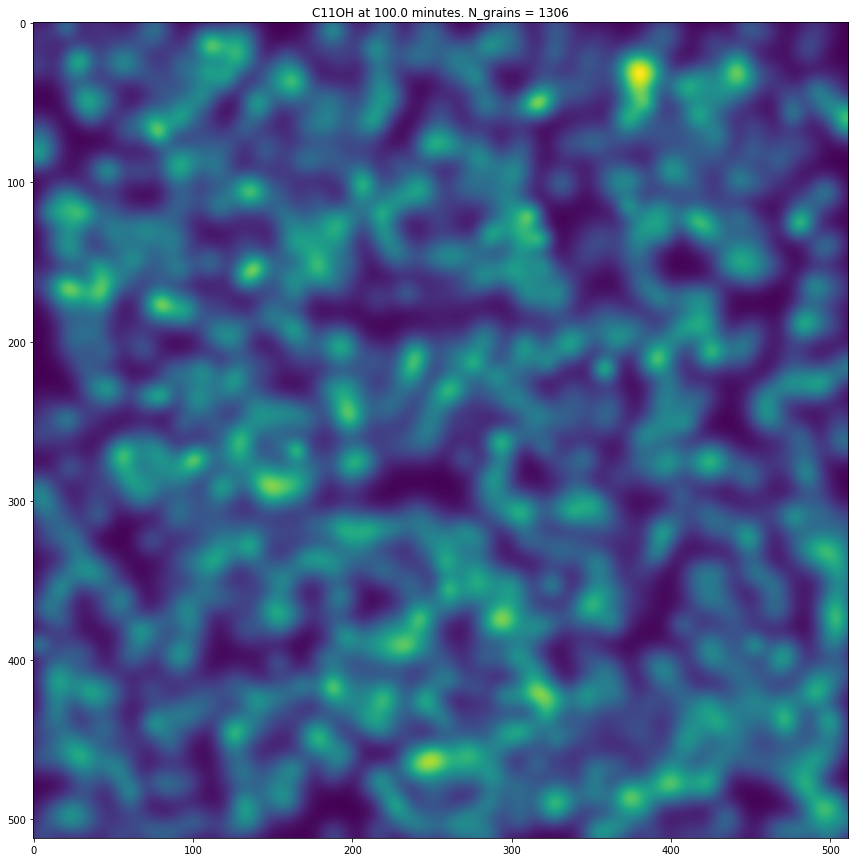

Generating: C11NF at 6.0 minutes. N_grains = 1198


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [07:14<00:00,  1.18it/s]


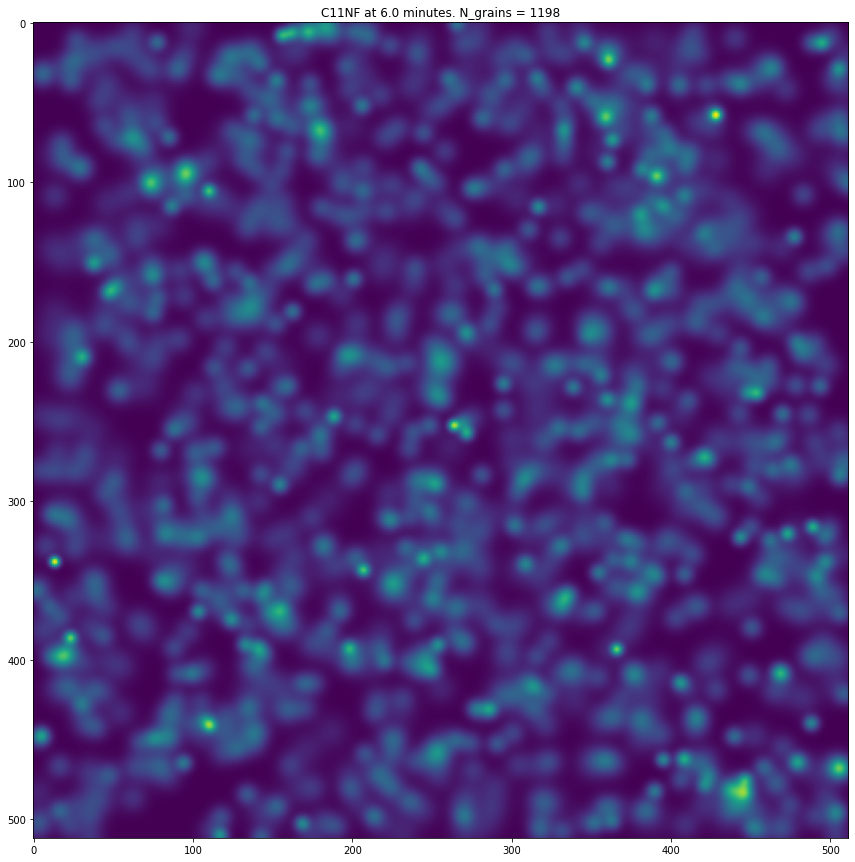

Generating: C11NF at 23.0 minutes. N_grains = 369


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:09<00:00,  3.94it/s]


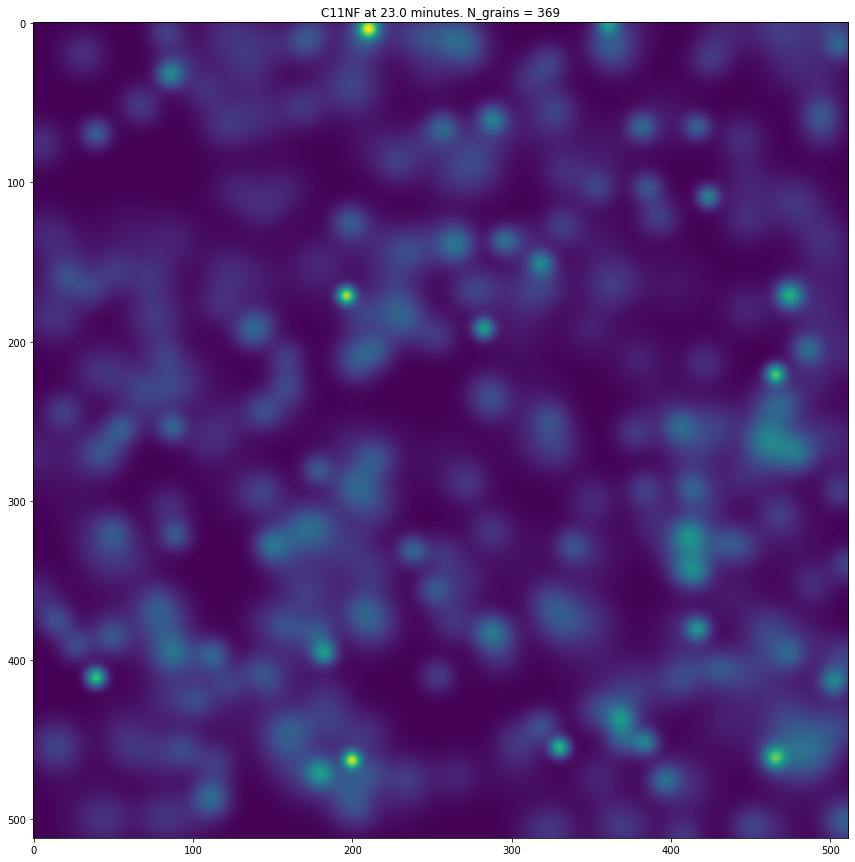

Generating: C11NF at 51.0 minutes. N_grains = 363


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:00<00:00,  4.26it/s]


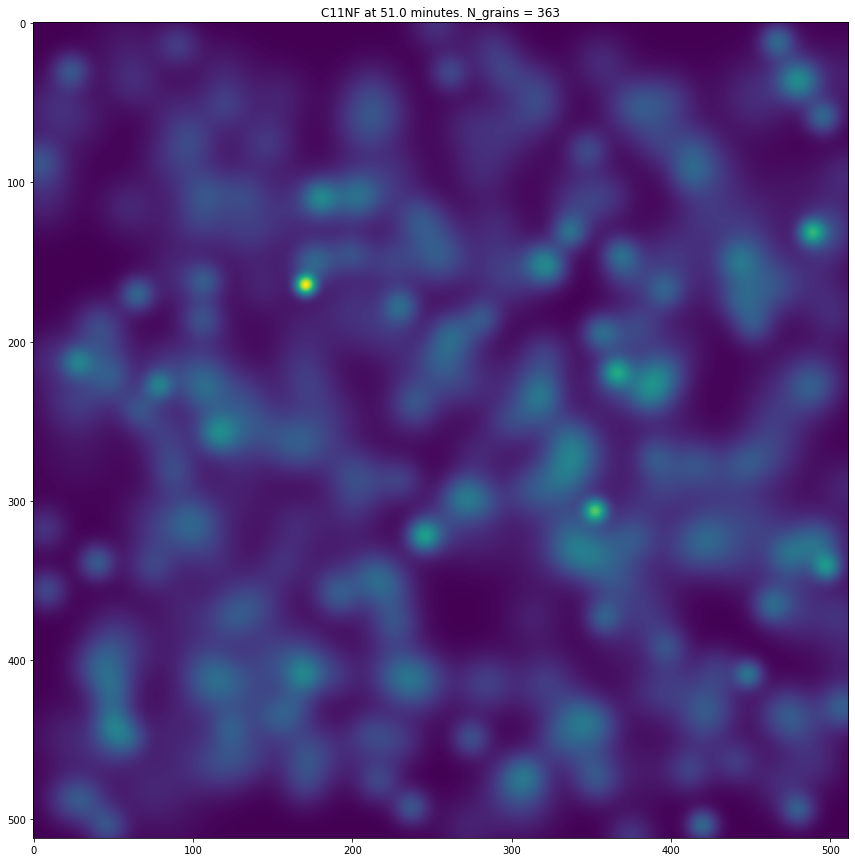

Generating: C11NF at 84.0 minutes. N_grains = 364


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:04<00:00,  4.11it/s]


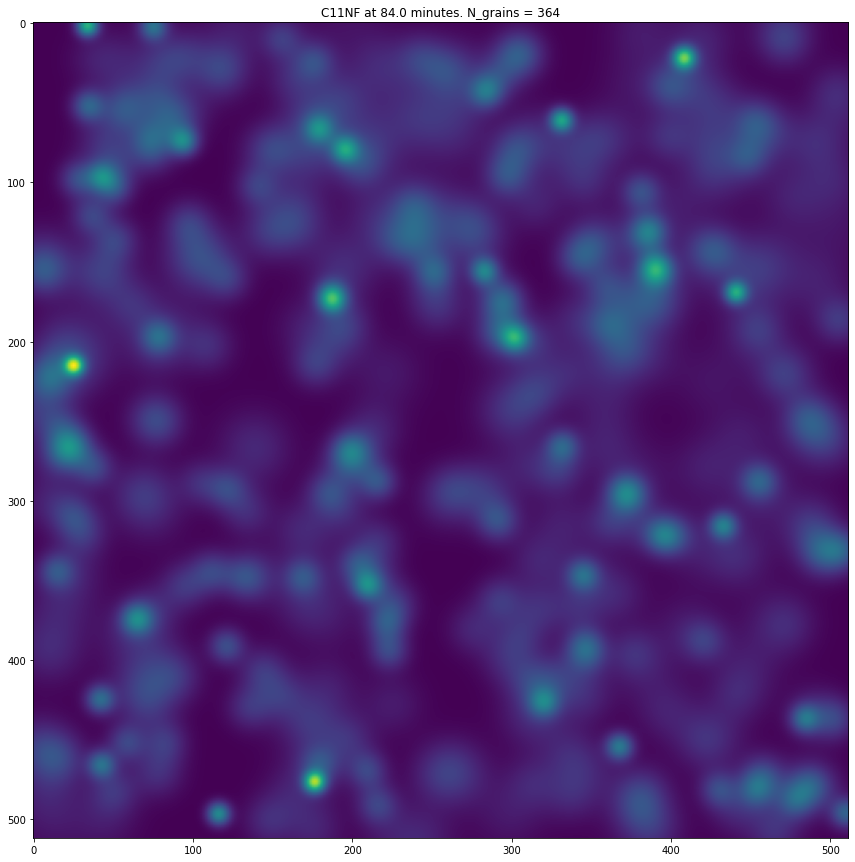

Generating: C11NF at 102.0 minutes. N_grains = 368


100%|█████████████████████████████████████████████████████████████████████████████████| 512/512 [02:04<00:00,  4.11it/s]


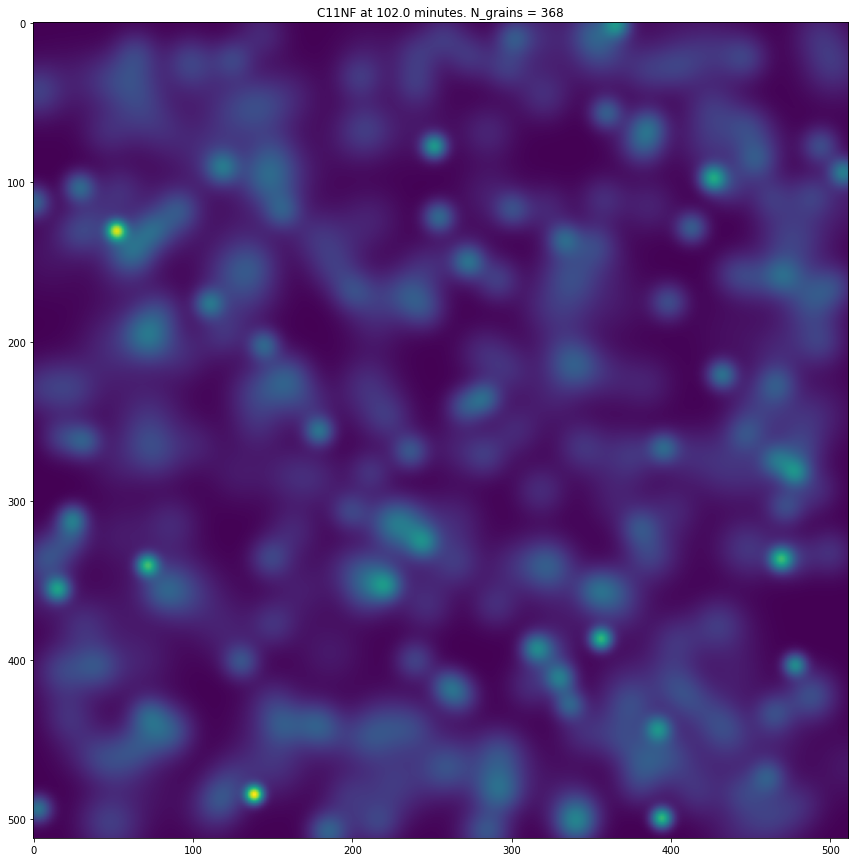

In [6]:
generate_data_Gauss(statistical_data, names_df, 512)